# scikit-tda

Zestaw bibliotek do topologicznej analizy danych, stworzony z myślą, żeby mogły z nich korzystać osoby niezwiązane z topologią.

[https://scikit-tda.org/](https://scikit-tda.org/)

## Główne gałęzie topologicznej analizy danych (TDA)
- **Persistent homology** - badanie ilości spójnych składowych, dziur, pustek, itd. dla chmury punktów
- **Mapper** - metoda wizualizacji i eksploracji wysoko wymiarowych danych

## Jakie biblioteki zawiera scikit-tda?
- **Ripser.py** - obliczanie persistent homology
- **Kepler Mapper** - implementacja Mappera z bardzo ładnymi wizualizacjami
- **Persim** - można powiedzieć, że to dodatek do Ripsera; posiada między innymi funkcje rysowania "persistence diagrams", które są wynikiem działania Rispera
- **CechMate** - zawiera filtracje do generowania kompleksów symplicjalnych na podstawie chmury punktów, Ripser robi to automatycznie, ale ta biblioteka zawiera również inne sposoby generowania
- **TaDAsets** - pozwala generować losową chmurę punktów na danym "kształcie", np. na *n* wymiarowej sferze lub na torusie

# Dziury
Trudne do zdefiniowania, ale intuicyjnie jest proste czym są.

### Przykład "kształtów" z jedną 1-wymiarową dziurą:
![1-sphere](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Circle_-_black_simple.svg/240px-Circle_-_black_simple.svg.png)
[źródło](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Circle_-_black_simple.svg/240px-Circle_-_black_simple.svg.png)

czyli okrąg, albo inaczej (1)-sfera.

Jeśli założymy, że brzegi "blaszki do pieczenia z wyłamanym środkiem" są wypełnione, to również ona ma jedną 1-wymiarową dziurę:
![torus-with-filling](https://i.imgur.com/EdrVM6z.png)
Jeśli brzegi nie są wypełnione, to mamy dwie 1-wymiarowe dziury oraz jedną 2-wymiarową (ta pustka w brzegach jest wtedy dziurą 2-wymiarową). Taki kształt to kombinatoryczny torus.

### Trzy 1-wymiarowe dziury:
![](https://i.imgur.com/WAp0hZq.png)

Liczba dziur 0-wymiarowych to liczba spójnych składowych przestrzeni. Wszystkie poprzednie przykłady miały jedną dziurę 0-wymiarową, bo były spójne. Przykład zbioru z dwoma dziurami 0-wymiarowymi:
<img src="https://i.imgur.com/EKVuM0A.png" style="width: 300px;"/>

### Przykład kształtu z jedną dziurą 2-wymiarową:
<img src="https://143530-415148-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2017/07/Sphere-1024x993.png" width=300px>

[źródło](https://143530-415148-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2017/07/Sphere-1024x993.png)

czyli (2)-sfera.

# Persistent homology
Załóżmy, że mamy skończony zbiór punktów X. Dla przykładu niech będą to punkty na okręgu:

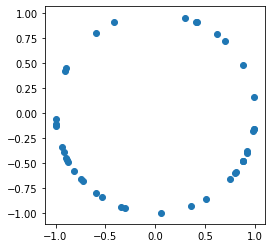

In [128]:
import tadasets
import matplotlib.pyplot as plt

# n - ilość punktów jaką chcemy wysamplować
# r - promień okręgu (d-sfery)
# d - wymiarowość d-sfery; tutaj 1, czyli 1-sfera=okrąg
X = tadasets.dsphere(n=40, r=1, d=1)

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(X[:, 0], X[:, 1])

Chcielibyśmy policzyć ile dziur ma przestrzeń z której wysamplowaliśmy dane, mając tylko ten skończony zbiór danych. Musimy zatem stworzyć z nich jakąś ciągłą reprezentacje. Idea jest następująca:

1. Dla danego promienia $r>0$ z punktów robimy koła o promieniu $r$.
2. Dla każdych dwóch punktów $x$, $y$ ze zbioru danych, jeśli ich koła się przecinają to dodajemy krawędź między $x$ a $y$ do naszej ciągłej reprezentacji.
3. Dla każdych trzech punktów $x$, $y$, $z$ ze zbioru danych, jeśli ich koła się przecinają, to dodajemy wypełniony trójkąt rozpiętny na tych punktach do naszej ciągłej reprezentacji.
4. Możemy robić tak dalej dla kolejnych n-punktów, ale w przypadku okręgu nie ma to sensu, bo jesteśmy w przestrzeni $\mathbb{R}^2$.

Dla takiej ciągłej reprezentacji przy ustalonym promieniu $r$ mamy już algorytmiczny sposób liczenia ilości dziur - homologie.

Ale jak wybrać promień $r$? Jeśli dane są wysoko wymiarowe to nawet nie jesteśmy w stanie go wybrać "na oko". Dlatego chcemy rozpatrywać wszystkie możliwe $r>0$ i sprawdzać jak zmienia się ilość dziur:

<img src="https://christian.bock.ml/filtration_cover.png" width=500px>

[źródło](https://christian.bock.ml/filtration_cover.png)

I taka jest idea tego co robią algorytmy liczące persitent homology. Policzmy ją dla punktów X z okręgu wysamplowanych wcześniej.

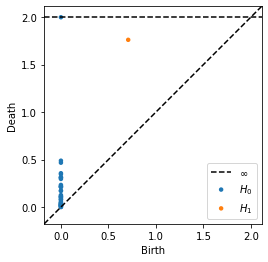

In [129]:
from ripser import ripser
from persim import plot_diagrams

dgms = ripser(X)['dgms']
plot_diagrams(dgms, show=True)

*Birth* oznacza, dla jakiego promienia $r$ dziura się pojawiła, a *Death* dla jakiego promienia znika. Punkty na poziomej lini przerywanej oznaczają, że dana dziura nigdy nie znika.

$H_0$ to dziury 0-wymiarowe (spójne składowe), a $H_1$ to dziury 1-wymiarowe (na przykład wnętrze okręgu).

In [130]:
# ripser(X)['dgms'] jest listą zawierającej listy (właściwie tablice z numpy)
# par (Birth, Death) wszystkich wyznaczonych dziur.

print("Czas istnienia pięciu pierwszych 0-wymiarowych dziur:\n", dgms[0][:5])
print("Czas istnienia jedynej znalezionej 1-wymiarowej dziury:\n", dgms[1])

Czas istnienia pięciu pierwszych 0-wymiarowych dziur:
 [[0.         0.00057868]
 [0.         0.00149845]
 [0.         0.00570207]
 [0.         0.00933859]
 [0.         0.01429761]]
Czas istnienia jedynej znalezionej 1-wymiarowej dziury:
 [[0.70802641 1.7603066 ]]


### Co gdy do danych dodamy trochę szumu?

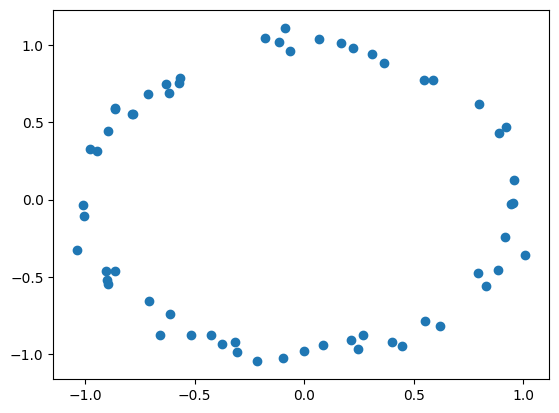

In [131]:
# Paramter noise określa procent szumu jaki chcemy dodać do danych. Domyślnie 0.
X = tadasets.dsphere(n=60, r=1, d=1, noise=0.05)

plt.scatter(X[:, 0], X[:, 1])

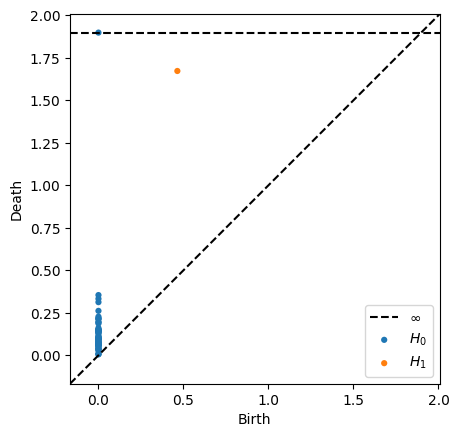

In [132]:
dgms = ripser(X)['dgms']
plot_diagrams(dgms, show=True)

### Policzmy jeszcze dla torusa

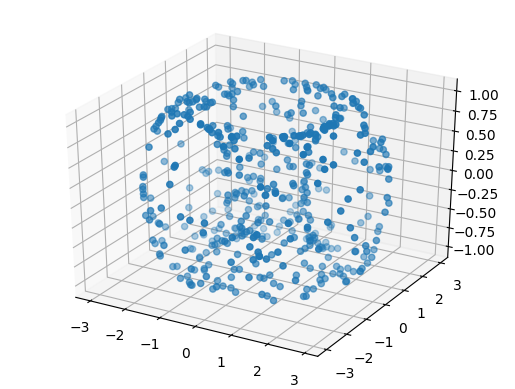

In [133]:
# c - odległość od środka torusa do środka tuby torusa
# a - promień tuby torusa
X = tadasets.torus(n=500, c=2, a=1)
tadasets.plot3d(X)

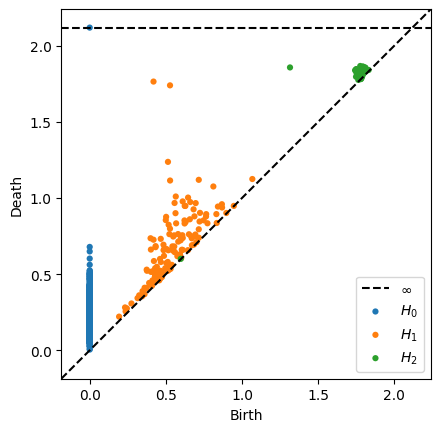

In [134]:
# Parametr `maxdims` oznacza do którego maksymalnie wymiaru dziury chcemy znaleźć,
# domyślnie jest to ustawione na 1.
dgms = ripser(X, maxdim=2)['dgms']
plot_diagrams(dgms, show=True)

`ripser` ma jeszcze parę parametrów, które można zmienić. Z tych bardziej ciekawych to jest parametr `distance_matrix`, domyślnie ustawiony na `False`; określa on, czy X jest macierzą z punktami czy macierzą odległości między punktami.

Jeśli chcielibyśmy użyć diagramów które wypluwa nam `ripser` jako dodatkowego feature'a w jakimś zadaniu MLowym, to mamy problem, bo długość tablic (z parami (*Birth*, *Death*)), które nam wypluwa nie jest z góry ustalona. Biblioteka `PersIm` z `scikit-tda` zawiera klasę, która przekształca "persistence diagram" na obrazek, który możemy już standarowymi sposobami zwektoryzować. Dodatkowo algorytm tam użyty jest stabilny w tym sensie, że mała perturbacja wejścia powoduje małe zmiany obrazka.

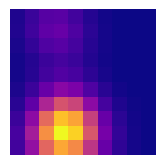

In [135]:
from persim import PersImage

# spread - odchylenie standardowe jądra Gaussowskiego,
#          intuicyjnie im niższa wartość tym mniej każda kropka
#          z diagramu oddziałuje na swoją okolicę na obrazku
# pixels - wymiary obrazka które chcemy uzyskać
pim = PersImage(spread=0.2, pixels=[10,10], verbose=False)
img = pim.transform(dgms[1])

ax = plt.subplot(131)
pim.show(img, ax)

# Kepler Mapper
<img src="https://i.imgur.com/5L1dwA1.png" width=800px>

In [136]:
from sklearn.datasets import load_boston
import kmapper as km
from kmapper import jupyter

X, y = load_boston(return_X_y=True)
data = np.concatenate((X, y.reshape(-1, 1)), axis=1)

In [137]:
mapper = km.KeplerMapper()

# Robi projekcje, która nas interesuje.
# Tutaj robimy rzutowanie na cenę domów (y),
# ale projekcja może być również właściwie
# dowolną klasą implementującą `fit_transform`.
# Domyślnie po projekcji wartości są skalowane do przedziału [0, 1]. 
projected_data = mapper.fit_transform(data, projection=[data.shape[1] - 1])

In [138]:
# Na podstawie danych po projekcji tworzy graf:
# 1. Pokrywa dane po projekcji nakładającymi się na siebie hiperkostkami,
#    w naszym przypadku przedziałami w ilości 15 z 20% nakładzaniem się przedziałów.
#    Reguluje to parametr `cover`.
# 2. Dla każdej hiperkostki (dla nas: przedziału) znajduje jej przeciwobraz poprzez
#    projekcje i na tym przeciwobrazie wyznacza klastery. Tutaj używamy KMeans z 3 klasterami.
# 3. Każdy klaster staje się wierzchołkiem w tworzonym grafie.
# 4. Jeśli dwa klastery mają wspólne elementy (sample) to dodajemy między nimi krawędź.
graph = mapper.map(
    projected_data,
    data,
    clusterer=sklearn.cluster.KMeans(n_clusters=3),
    cover=km.Cover(n_cubes=15, perc_overlap=0.2)
)

In [139]:
# Opcjonalnie tworzymy opis każdego z sampli, tu po prostu używamy wartości trzech kolumn.
samples_str_repr = np.array(
    [f"(CRIM: {sample[0]}, TAX: {sample[9]}, PRICE: {price * 1000}$)" for sample, price in zip(X, y)]
)

In [140]:
# Tworzy wizualizacje grafu (w HTML) utworzonego wyżej:
# - im większy wierzchołek tym więcej sampli w klasterze
# - `color_values` określa kolor każdego sampla,
#   a następnie jako kolor wierzchołka bierzemy średni kolor z klastera;
#   u nas bierzemy jako kolor cenę domu,
#   czyli im jaśniejsze kolory tym większe średnie ceny
# - zapisujemy do "boston_house_prices.html"
html = mapper.visualize(
    graph,
    path_html="boston_house_prices.html",
    title="Boston house prices",
    custom_tooltips=samples_str_repr,
    color_values=y
)

In [142]:
# Wyświetlamy "boston_house_prices.html" w Jupyterze
jupyter.display(path_html="boston_house_prices.html")